<a href="https://colab.research.google.com/github/arthurantonio/ProcessosEstocasticos/blob/main/FinalEstocasticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Arthur Antonio Rezende Pereira - 15111735
* Isadora Brunetti Delgado - 13862712


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

##Apple

In [ ]:
ticker = 'AAPL'
inicio = '2020-01-01'
fim = '2024-01-01'
data = yf.download(ticker, start=inicio, end=fim)

# Calcular a média móvel de 10 dias
data.columns = data.columns.droplevel(1)
data['MA10'] = data['Close'].rolling(window=10).mean()
data = data.dropna()

# Definindo a faixa de tolerância em torno da média móvel (ex: 2%)
tolerance = 0.02  # 2%

# Estado Estável é quando o preço de fechamento está dentro da faixa de tolerância da média móvel
# Alinhar as séries antes de realizar as comparações
data['MA10'] = data['MA10'].ffill()  # Preenche valores ausentes na MA10, se houver
data['Close'] = data['Close'].ffill()  # Preenche valores ausentes no Close, se houver


# Ver os primeiros dados
dados_novos = data[['Close', 'MA10']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
data['State'] = 'Alto'  # Inicializa como 'Alto'
data.loc[data['Close'] < data['MA10'] * (1 - tolerance), 'State'] = 'Baixo'
data.loc[(data['Close'] >= data['MA10'] * (1 - tolerance)) & (data['Close'] <= data['MA10'] * (1 + tolerance)), 'State'] = 'Estável'

data[['Close', 'MA10', 'State']]

Price,Close,MA10,State
Date,,,
2020-01-15,77.834999,76.502499,Estável
2020-01-16,78.809998,76.874749,Alto
2020-01-17,79.682503,77.407249,Alto
2020-01-21,79.142502,77.826500,Estável
2020-01-22,79.425003,78.309250,Estável
...,...,...,...
2023-12-22,193.600006,195.747002,Estável
2023-12-26,193.050003,195.734003,Estável
2023-12-27,193.149994,195.578001,Estável


In [ ]:
estado_counts = data['State'].value_counts()
estado_counts

,count
State,
Estável,491
Alto,307
Baixo,199


In [ ]:
dados_novos = data[['Close', 'MA10', 'State']]
dados_novos

Price,Close,MA10,State
Date,,,
2020-01-15,77.834999,76.502499,Estável
2020-01-16,78.809998,76.874749,Alto
2020-01-17,79.682503,77.407249,Alto
2020-01-21,79.142502,77.826500,Estável
2020-01-22,79.425003,78.309250,Estável
...,...,...,...
2023-12-22,193.600006,195.747002,Estável
2023-12-26,193.050003,195.734003,Estável
2023-12-27,193.149994,195.578001,Estável


In [ ]:
dados_novos['State'] = dados_novos['State'].replace({'Baixo': 0, 'Estável': 1, 'Alto': 2})

dados_novos

<ipython-input-6-09d520d1b36c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_novos['State'] = dados_novos['State'].replace({'Baixo': 0, 'Estável': 1, 'Alto': 2})
<ipython-input-6-09d520d1b36c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novos['State'] = dados_novos['State'].replace({'Baixo': 0, 'Estável': 1, 'Alto': 2})


Price,Close,MA10,State
Date,,,
2020-01-15,77.834999,76.502499,1
2020-01-16,78.809998,76.874749,2
2020-01-17,79.682503,77.407249,2
2020-01-21,79.142502,77.826500,1
2020-01-22,79.425003,78.309250,1
...,...,...,...
2023-12-22,193.600006,195.747002,1
2023-12-26,193.050003,195.734003,1
2023-12-27,193.149994,195.578001,1


In [ ]:
# Contar as transições entre estados
transicoes = Counter()
for i in range(len(dados_novos) - 1):
    estado_atual = dados_novos['State'].iloc[i]
    proximo_estado = dados_novos['State'].iloc[i+1]
    transicoes[(estado_atual, proximo_estado)] += 1

In [ ]:
prob_zero_zero = transicoes[(0, 0)] / (transicoes[(0, 0)] + transicoes[(0, 1)] + transicoes[(0, 2)])
prob_zero_um = transicoes[(0, 1)] / (transicoes[(0, 0)] + transicoes[(0, 1)] + transicoes[(0, 2)])
prob_zero_dois = transicoes[(0, 2)] / (transicoes[(0, 0)] + transicoes[(0, 1)] + transicoes[(0, 2)])
prob_um_zero = transicoes[(1, 0)] / (transicoes[(1, 0)] + transicoes[(1, 1)] + transicoes[(1, 2)])
prob_um_um = transicoes[(1, 1)] / (transicoes[(1, 0)] + transicoes[(1, 1)] + transicoes[(1, 2)])
prob_um_dois = transicoes[(1, 2)] / (transicoes[(1, 0)] + transicoes[(1, 1)] + transicoes[(1, 2)])
prob_dois_zero = transicoes[(2, 0)] / (transicoes[(2, 0)] + transicoes[(2, 1)] + transicoes[(2, 2)])
prob_dois_um = transicoes[(2, 1)] / (transicoes[(2, 0)] + transicoes[(2, 1)] + transicoes[(2, 2)])
prob_dois_dois = transicoes[(2, 2)] / (transicoes[(2, 0)] + transicoes[(2, 1)] + transicoes[(2, 2)])

In [ ]:
matriz_transicao = np.array([
    [prob_zero_zero, prob_zero_um, prob_zero_dois],
    [prob_um_zero, prob_um_um, prob_um_dois],
    [prob_dois_zero, prob_dois_um, prob_dois_dois]
])

print("Matriz de Transição:")
matriz_transicao

Matriz de Transição:


array([[0.67336683, 0.31658291, 0.01005025],
       [0.13061224, 0.71020408, 0.15918367],
       [0.00325733, 0.25732899, 0.73941368]])

In [ ]:
print("Soma das linhas da matriz de transição:")
print(matriz_transicao.sum(axis=1))

Soma das linhas da matriz de transição:
[1. 1. 1.]


In [ ]:
P = matriz_transicao

# Estados iniciais possíveis
initial_states = {
    'Baixo': np.array([1, 0, 0]),
    'Estável': np.array([0, 1, 0]),
    'Alto': np.array([0, 0, 1])
}

# Número de passos no tempo
steps = 20

results = {}
for state_name, initial_state in initial_states.items():
    state = initial_state
    states_history = [state]  # Inicia o histórico com o estado inicial
    for _ in range(steps):
        state = np.dot(state, P)
        states_history.append(state)
    results[state_name] = np.array(states_history)  # Converte para numpy array

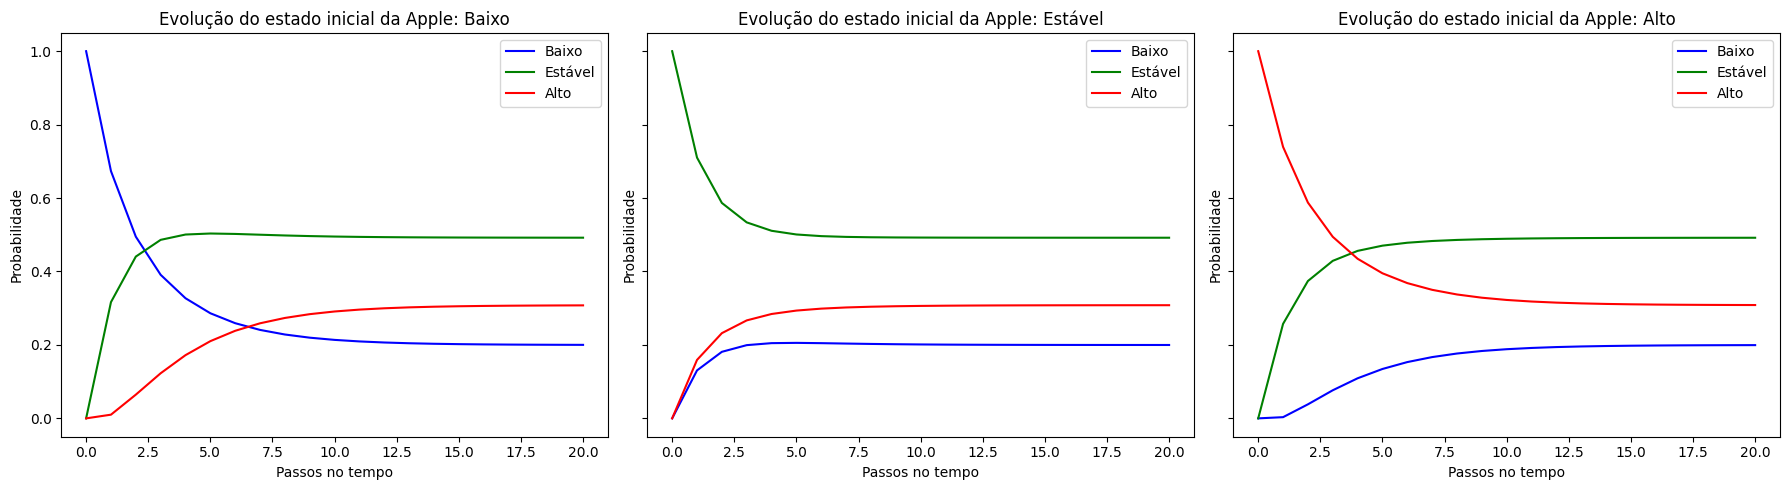

In [ ]:
# Configura os gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (state_name, history) in zip(axes, results.items()):
    ax.plot(range(steps + 1), history[:, 0], label="Baixo", color="blue")
    ax.plot(range(steps + 1), history[:, 1], label="Estável", color="green")
    ax.plot(range(steps + 1), history[:, 2], label="Alto", color="red")
    ax.set_title(f"Evolução do estado inicial da Apple: {state_name}")
    ax.set_xlabel("Passos no tempo")
    ax.set_ylabel("Probabilidade")
    ax.legend()

plt.tight_layout()
plt.show()

##Microsoft

In [ ]:
ticker = 'MSFT'
inicio = '2020-01-01'
fim = '2024-01-01'
data = yf.download(ticker, start=inicio, end=fim)

# Calcular a média móvel de 10 dias
data.columns = data.columns.droplevel(1)
data['MA20'] = data['Close'].rolling(window=10).mean()
data = data.dropna()

# Definindo a faixa de tolerância em torno da média móvel (ex: 2%)
tolerance = 0.02  # 2%

# Estado Estável é quando o preço de fechamento está dentro da faixa de tolerância da média móvel
# Alinhar as séries antes de realizar as comparações
data['MA20'] = data['MA20'].ffill()  # Preenche valores ausentes na MA10, se houver
data['Close'] = data['Close'].ffill()  # Preenche valores ausentes no Close, se houver


# Ver os primeiros dados
dados_novos = data[['Close', 'MA20']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
data['State'] = 'Alto'  # Inicializa como 'Alto'
data.loc[data['Close'] < data['MA20'] * (1 - tolerance), 'State'] = 'Baixo'
data.loc[(data['Close'] >= data['MA20'] * (1 - tolerance)) & (data['Close'] <= data['MA20'] * (1 + tolerance)), 'State'] = 'Estável'

data[['Close', 'MA20', 'State']]

Price,Close,MA20,State
Date,,,
2020-01-15,163.179993,160.795998,Estável
2020-01-16,166.169998,161.350998,Alto
2020-01-17,167.100006,162.198999,Alto
2020-01-21,166.500000,162.945999,Alto
2020-01-22,165.699997,163.757999,Estável
...,...,...,...
2023-12-22,374.579987,372.135999,Estável
2023-12-26,374.660004,372.472000,Estável
2023-12-27,374.070007,372.441000,Estável


In [ ]:
estado_counts = data['State'].value_counts()
estado_counts

,count
State,
Estável,516
Alto,288
Baixo,193


In [ ]:
dados_novos = data[['Close', 'MA20', 'State']]
dados_novos

Price,Close,MA20,State
Date,,,
2020-01-15,163.179993,160.795998,Estável
2020-01-16,166.169998,161.350998,Alto
2020-01-17,167.100006,162.198999,Alto
2020-01-21,166.500000,162.945999,Alto
2020-01-22,165.699997,163.757999,Estável
...,...,...,...
2023-12-22,374.579987,372.135999,Estável
2023-12-26,374.660004,372.472000,Estável
2023-12-27,374.070007,372.441000,Estável


In [ ]:
dados_novos['State'] = dados_novos['State'].replace({'Baixo': 0, 'Estável': 1, 'Alto': 2})

dados_novos

<ipython-input-25-09d520d1b36c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_novos['State'] = dados_novos['State'].replace({'Baixo': 0, 'Estável': 1, 'Alto': 2})
<ipython-input-25-09d520d1b36c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novos['State'] = dados_novos['State'].replace({'Baixo': 0, 'Estável': 1, 'Alto': 2})


Price,Close,MA20,State
Date,,,
2020-01-15,163.179993,160.795998,1
2020-01-16,166.169998,161.350998,2
2020-01-17,167.100006,162.198999,2
2020-01-21,166.500000,162.945999,2
2020-01-22,165.699997,163.757999,1
...,...,...,...
2023-12-22,374.579987,372.135999,1
2023-12-26,374.660004,372.472000,1
2023-12-27,374.070007,372.441000,1


In [ ]:
# Contar as transições entre estados
transicoes = Counter()
for i in range(len(dados_novos) - 1):
    estado_atual = dados_novos['State'].iloc[i]
    proximo_estado = dados_novos['State'].iloc[i+1]
    transicoes[(estado_atual, proximo_estado)] += 1

In [ ]:
prob_zero_zero = transicoes[(0, 0)] / (transicoes[(0, 0)] + transicoes[(0, 1)] + transicoes[(0, 2)])
prob_zero_um = transicoes[(0, 1)] / (transicoes[(0, 0)] + transicoes[(0, 1)] + transicoes[(0, 2)])
prob_zero_dois = transicoes[(0, 2)] / (transicoes[(0, 0)] + transicoes[(0, 1)] + transicoes[(0, 2)])
prob_um_zero = transicoes[(1, 0)] / (transicoes[(1, 0)] + transicoes[(1, 1)] + transicoes[(1, 2)])
prob_um_um = transicoes[(1, 1)] / (transicoes[(1, 0)] + transicoes[(1, 1)] + transicoes[(1, 2)])
prob_um_dois = transicoes[(1, 2)] / (transicoes[(1, 0)] + transicoes[(1, 1)] + transicoes[(1, 2)])
prob_dois_zero = transicoes[(2, 0)] / (transicoes[(2, 0)] + transicoes[(2, 1)] + transicoes[(2, 2)])
prob_dois_um = transicoes[(2, 1)] / (transicoes[(2, 0)] + transicoes[(2, 1)] + transicoes[(2, 2)])
prob_dois_dois = transicoes[(2, 2)] / (transicoes[(2, 0)] + transicoes[(2, 1)] + transicoes[(2, 2)])

In [ ]:
matriz_transicao = np.array([
    [prob_zero_zero, prob_zero_um, prob_zero_dois],
    [prob_um_zero, prob_um_um, prob_um_dois],
    [prob_dois_zero, prob_dois_um, prob_dois_dois]
])

print("Matriz de Transição:")
matriz_transicao

Matriz de Transição:


array([[0.69430052, 0.28497409, 0.02072539],
       [0.10679612, 0.74368932, 0.14951456],
       [0.01388889, 0.26736111, 0.71875   ]])

In [ ]:
print("Soma das linhas da matriz de transição:")
print(matriz_transicao.sum(axis=1))

Soma das linhas da matriz de transição:
[1. 1. 1.]


In [ ]:
P = matriz_transicao

# Estados iniciais possíveis
initial_states = {
    'Baixo': np.array([1, 0, 0]),
    'Estável': np.array([0, 1, 0]),
    'Alto': np.array([0, 0, 1])
}

# Número de passos no tempo
steps = 20

results = {}
for state_name, initial_state in initial_states.items():
    state = initial_state
    states_history = [state]  # Inicia o histórico com o estado inicial
    for _ in range(steps):
        state = np.dot(state, P)
        states_history.append(state)
    results[state_name] = np.array(states_history)  # Converte para numpy array

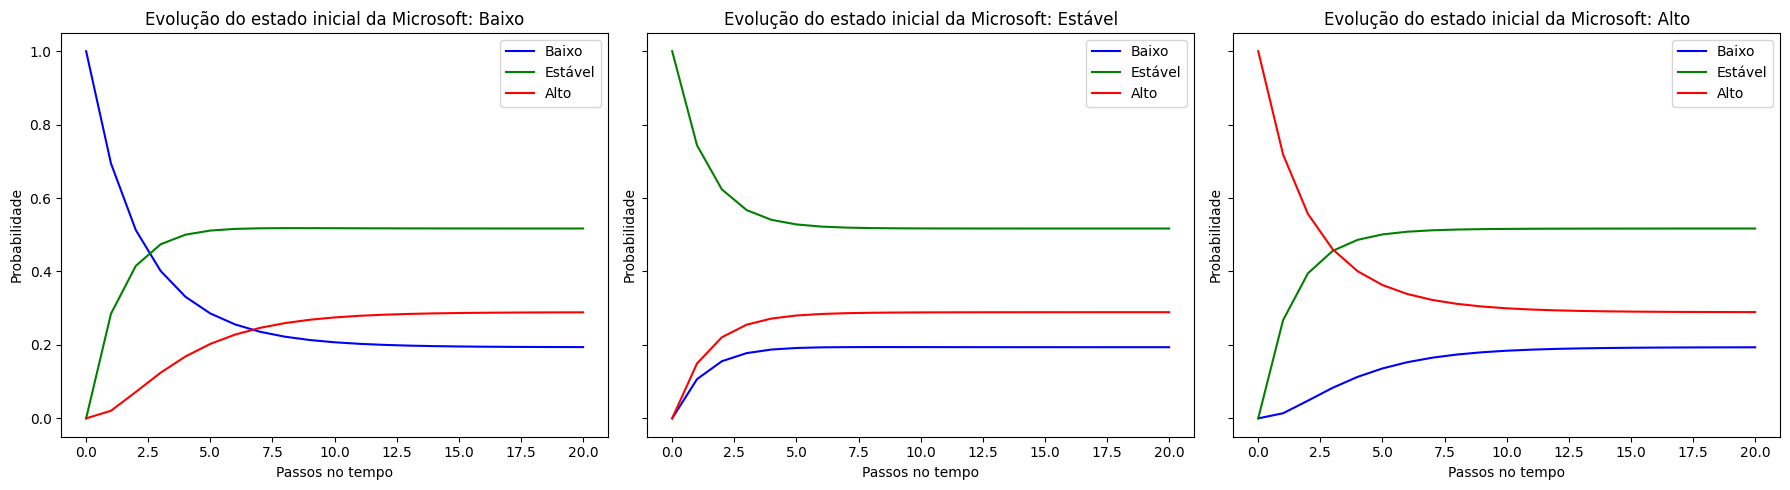

In [ ]:
# Configura os gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (state_name, history) in zip(axes, results.items()):
    ax.plot(range(steps + 1), history[:, 0], label="Baixo", color="blue")
    ax.plot(range(steps + 1), history[:, 1], label="Estável", color="green")
    ax.plot(range(steps + 1), history[:, 2], label="Alto", color="red")
    ax.set_title(f"Evolução do estado inicial da Microsoft: {state_name}")
    ax.set_xlabel("Passos no tempo")
    ax.set_ylabel("Probabilidade")
    ax.legend()

plt.tight_layout()
plt.show()

##Tesla

In [ ]:
ticker = 'TSLA'
inicio = '2020-01-01'
fim = '2024-01-01'
data = yf.download(ticker, start=inicio, end=fim)

# Calcular a média móvel de 10 dias
data.columns = data.columns.droplevel(1)
data['MA20'] = data['Close'].rolling(window=10).mean()
data = data.dropna()

# Definindo a faixa de tolerância em torno da média móvel (ex: 2%)
tolerance = 0.02  # 2%

# Estado Estável é quando o preço de fechamento está dentro da faixa de tolerância da média móvel
# Alinhar as séries antes de realizar as comparações
data['MA20'] = data['MA20'].ffill()  # Preenche valores ausentes na MA10, se houver
data['Close'] = data['Close'].ffill()  # Preenche valores ausentes no Close, se houver


# Ver os primeiros dados
dados_novos = data[['Close', 'MA20']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
data['State'] = 'Alto'  # Inicializa como 'Alto'
data.loc[data['Close'] < data['MA20'] * (1 - tolerance), 'State'] = 'Baixo'
data.loc[(data['Close'] >= data['MA20'] * (1 - tolerance)) & (data['Close'] <= data['MA20'] * (1 + tolerance)), 'State'] = 'Estável'

data[['Close', 'MA20', 'State']]

Price,Close,MA20,State
Date,,,
2020-01-15,34.566666,32.178533,Alto
2020-01-16,34.232666,32.733400,Alto
2020-01-17,34.033333,33.183333,Alto
2020-01-21,36.480000,33.821066,Alto
2020-01-22,37.970669,34.491066,Alto
...,...,...,...
2023-12-22,252.539993,248.406999,Estável
2023-12-26,256.609985,250.093997,Alto
2023-12-27,261.440002,252.536998,Alto


In [ ]:
estado_counts = data['State'].value_counts()
estado_counts

,count
State,
Alto,425
Baixo,312
Estável,260


In [ ]:
dados_novos = data[['Close', 'MA20', 'State']]
dados_novos

Price,Close,MA20,State
Date,,,
2020-01-15,34.566666,32.178533,Alto
2020-01-16,34.232666,32.733400,Alto
2020-01-17,34.033333,33.183333,Alto
2020-01-21,36.480000,33.821066,Alto
2020-01-22,37.970669,34.491066,Alto
...,...,...,...
2023-12-22,252.539993,248.406999,Estável
2023-12-26,256.609985,250.093997,Alto
2023-12-27,261.440002,252.536998,Alto


In [ ]:
dados_novos['State'] = dados_novos['State'].replace({'Baixo': 0, 'Estável': 1, 'Alto': 2})

dados_novos

<ipython-input-37-09d520d1b36c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_novos['State'] = dados_novos['State'].replace({'Baixo': 0, 'Estável': 1, 'Alto': 2})
<ipython-input-37-09d520d1b36c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novos['State'] = dados_novos['State'].replace({'Baixo': 0, 'Estável': 1, 'Alto': 2})


Price,Close,MA20,State
Date,,,
2020-01-15,34.566666,32.178533,2
2020-01-16,34.232666,32.733400,2
2020-01-17,34.033333,33.183333,2
2020-01-21,36.480000,33.821066,2
2020-01-22,37.970669,34.491066,2
...,...,...,...
2023-12-22,252.539993,248.406999,1
2023-12-26,256.609985,250.093997,2
2023-12-27,261.440002,252.536998,2


In [ ]:
# Contar as transições entre estados
transicoes = Counter()
for i in range(len(dados_novos) - 1):
    estado_atual = dados_novos['State'].iloc[i]
    proximo_estado = dados_novos['State'].iloc[i+1]
    transicoes[(estado_atual, proximo_estado)] += 1

In [ ]:
prob_zero_zero = transicoes[(0, 0)] / (transicoes[(0, 0)] + transicoes[(0, 1)] + transicoes[(0, 2)])
prob_zero_um = transicoes[(0, 1)] / (transicoes[(0, 0)] + transicoes[(0, 1)] + transicoes[(0, 2)])
prob_zero_dois = transicoes[(0, 2)] / (transicoes[(0, 0)] + transicoes[(0, 1)] + transicoes[(0, 2)])
prob_um_zero = transicoes[(1, 0)] / (transicoes[(1, 0)] + transicoes[(1, 1)] + transicoes[(1, 2)])
prob_um_um = transicoes[(1, 1)] / (transicoes[(1, 0)] + transicoes[(1, 1)] + transicoes[(1, 2)])
prob_um_dois = transicoes[(1, 2)] / (transicoes[(1, 0)] + transicoes[(1, 1)] + transicoes[(1, 2)])
prob_dois_zero = transicoes[(2, 0)] / (transicoes[(2, 0)] + transicoes[(2, 1)] + transicoes[(2, 2)])
prob_dois_um = transicoes[(2, 1)] / (transicoes[(2, 0)] + transicoes[(2, 1)] + transicoes[(2, 2)])
prob_dois_dois = transicoes[(2, 2)] / (transicoes[(2, 0)] + transicoes[(2, 1)] + transicoes[(2, 2)])

In [ ]:
matriz_transicao = np.array([
    [prob_zero_zero, prob_zero_um, prob_zero_dois],
    [prob_um_zero, prob_um_um, prob_um_dois],
    [prob_dois_zero, prob_dois_um, prob_dois_dois]
])

print("Matriz de Transição:")
matriz_transicao

Matriz de Transição:


array([[0.79099678, 0.1607717 , 0.04823151],
       [0.23076923, 0.51923077, 0.25      ],
       [0.01411765, 0.17647059, 0.80941176]])

In [ ]:
print("Soma das linhas da matriz de transição:")
print(matriz_transicao.sum(axis=1))

Soma das linhas da matriz de transição:
[1. 1. 1.]


In [ ]:
P = matriz_transicao

# Estados iniciais possíveis
initial_states = {
    'Baixo': np.array([1, 0, 0]),
    'Estável': np.array([0, 1, 0]),
    'Alto': np.array([0, 0, 1])
}

# Número de passos no tempo
steps = 14

results = {}
for state_name, initial_state in initial_states.items():
    state = initial_state
    states_history = [state]  # Inicia o histórico com o estado inicial
    for _ in range(steps):
        state = np.dot(state, P)
        states_history.append(state)
    results[state_name] = np.array(states_history)  # Converte para numpy array

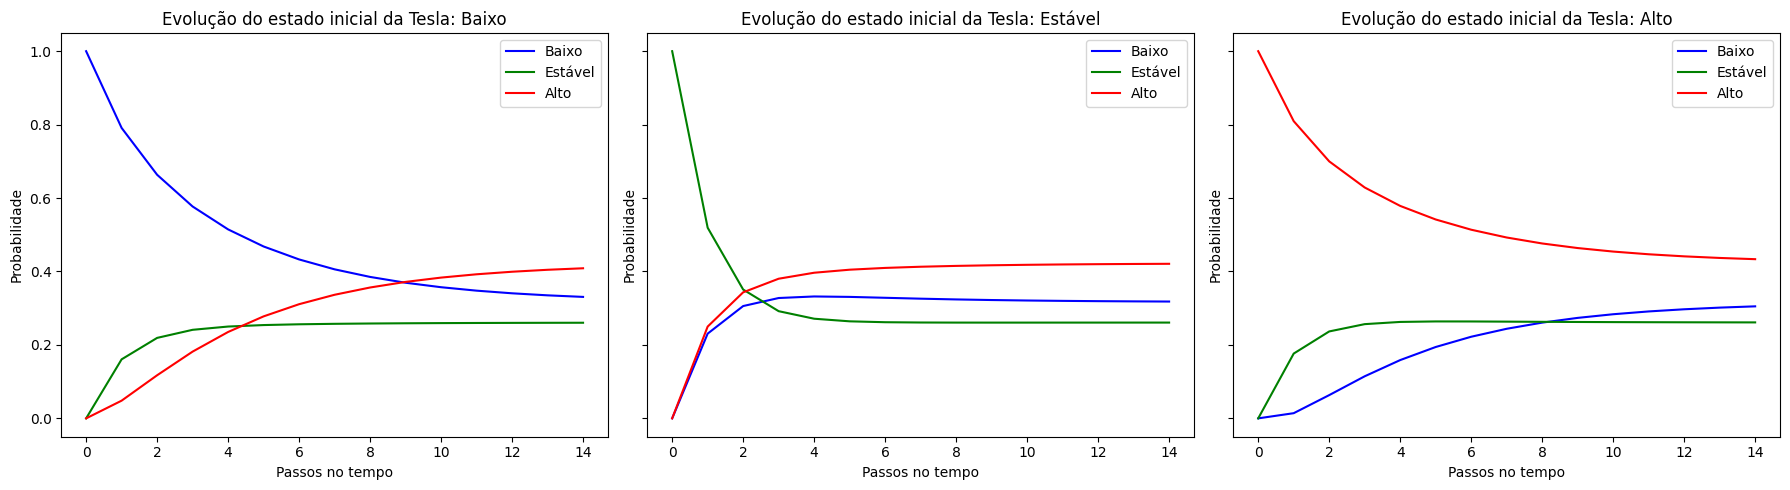

In [ ]:
# Configura os gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (state_name, history) in zip(axes, results.items()):
    ax.plot(range(steps + 1), history[:, 0], label="Baixo", color="blue")
    ax.plot(range(steps + 1), history[:, 1], label="Estável", color="green")
    ax.plot(range(steps + 1), history[:, 2], label="Alto", color="red")
    ax.set_title(f"Evolução do estado inicial da Tesla: {state_name}")
    ax.set_xlabel("Passos no tempo")
    ax.set_ylabel("Probabilidade")
    ax.legend()

plt.tight_layout()
plt.show()